In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv("ex1data1.txt",header = None)

In [4]:
data

,0,1
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
x = data.iloc[:,0]

In [6]:
x

0      6.1101
1      5.5277
2      8.5186
3      7.0032
4      5.8598
       ...   
92     5.8707
93     5.3054
94     8.2934
95    13.3940
96     5.4369
Name: 0, Length: 97, dtype: float64

In [7]:
y = data.iloc[:,1]

In [8]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: 1, Length: 97, dtype: float64

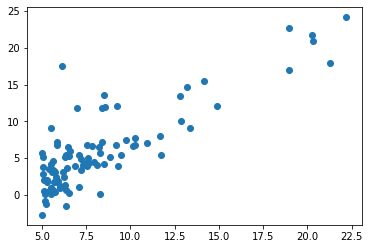

In [9]:
plt.scatter(x,y)

In [10]:
x = x[:,np.newaxis]

In [11]:
y = y[:,np.newaxis]

In [12]:
x

array([[ 6.1101],
       [ 5.5277],
       [ 8.5186],
       [ 7.0032],
       [ 5.8598],
       [ 8.3829],
       [ 7.4764],
       [ 8.5781],
       [ 6.4862],
       [ 5.0546],
       [ 5.7107],
       [14.164 ],
       [ 5.734 ],
       [ 8.4084],
       [ 5.6407],
       [ 5.3794],
       [ 6.3654],
       [ 5.1301],
       [ 6.4296],
       [ 7.0708],
       [ 6.1891],
       [20.27  ],
       [ 5.4901],
       [ 6.3261],
       [ 5.5649],
       [18.945 ],
       [12.828 ],
       [10.957 ],
       [13.176 ],
       [22.203 ],
       [ 5.2524],
       [ 6.5894],
       [ 9.2482],
       [ 5.8918],
       [ 8.2111],
       [ 7.9334],
       [ 8.0959],
       [ 5.6063],
       [12.836 ],
       [ 6.3534],
       [ 5.4069],
       [ 6.8825],
       [11.708 ],
       [ 5.7737],
       [ 7.8247],
       [ 7.0931],
       [ 5.0702],
       [ 5.8014],
       [11.7   ],
       [ 5.5416],
       [ 7.5402],
       [ 5.3077],
       [ 7.4239],
       [ 7.6031],
       [ 6.3328],
       [ 6

In [109]:
params = np.zeros([2,1])

In [110]:
params

array([[0.],
       [0.]])

In [65]:
iterations = 3000

In [66]:
alpha = 0.01

In [17]:
ones = np.ones((len(x),1))

In [18]:
x = np.hstack((ones,x))

In [19]:
x

array([[ 1.    ,  6.1101],
       [ 1.    ,  5.5277],
       [ 1.    ,  8.5186],
       [ 1.    ,  7.0032],
       [ 1.    ,  5.8598],
       [ 1.    ,  8.3829],
       [ 1.    ,  7.4764],
       [ 1.    ,  8.5781],
       [ 1.    ,  6.4862],
       [ 1.    ,  5.0546],
       [ 1.    ,  5.7107],
       [ 1.    , 14.164 ],
       [ 1.    ,  5.734 ],
       [ 1.    ,  8.4084],
       [ 1.    ,  5.6407],
       [ 1.    ,  5.3794],
       [ 1.    ,  6.3654],
       [ 1.    ,  5.1301],
       [ 1.    ,  6.4296],
       [ 1.    ,  7.0708],
       [ 1.    ,  6.1891],
       [ 1.    , 20.27  ],
       [ 1.    ,  5.4901],
       [ 1.    ,  6.3261],
       [ 1.    ,  5.5649],
       [ 1.    , 18.945 ],
       [ 1.    , 12.828 ],
       [ 1.    , 10.957 ],
       [ 1.    , 13.176 ],
       [ 1.    , 22.203 ],
       [ 1.    ,  5.2524],
       [ 1.    ,  6.5894],
       [ 1.    ,  9.2482],
       [ 1.    ,  5.8918],
       [ 1.    ,  8.2111],
       [ 1.    ,  7.9334],
       [ 1.    ,  8.0959],
 

In [20]:
def cost(x,y,params):
    pre = np.dot(x,params)
    diff = pre-y
    diffsquare = np.power(diff,2)
    return np.sum(diffsquare)/(2*len(x))

In [21]:
cost(x,y,params)

32.072733877455676

In [111]:
def gradientdescent(x,y,alpha,params,iterations,params_his,loss_history):
    for i in range(iterations):
        params_his.append(params)
        pre = np.dot(x,params)
        diff = pre-y
        loss_history.append(np.sum(np.power(diff,2))/(2*len(x)))
        z = np.dot(x.T,diff)
        params = params-(alpha/len(x))*z
    return params
        

In [112]:
params_his = []
loss_history = []
params = gradientdescent(x,y,alpha,params,iterations,params_his,loss_history)

In [113]:
params_his = np.array(params_his)

In [114]:
loss_history = np.array(loss_history)

In [116]:
new_pre = np.dot(x,params)

In [117]:
rss = np.sum(np.power(new_pre-y,2))

In [118]:
tss = np.sum(np.power(np.mean(y)-new_pre,2))

In [119]:
np.mean(y)

5.839135051546393

In [120]:
1-(rss/tss)

0.5742899148442824

implementing using scikit learn

In [126]:
from sklearn.linear_model import LinearRegression

In [128]:
line = LinearRegression()

In [129]:
line.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [130]:
ypre = line.predict(x)

In [132]:
from sklearn.metrics import r2_score

In [133]:
r2_score(ypre,y)

0.5755626016954223

Hence both scores of selfimplemented model and model implemeted using scikit learn has same scores